<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek38.do.txt  -->
<!-- dom:TITLE: Exercises week 38 -->

# Exercises week 38
**September 16-20, 2024**

Date: **Deadline is Friday September 20 at midnight**

## Overarching aims of the exercises this week

The aim of the exercises this week is to derive the equations for the bias-variance tradeoff to be used in project 1 as well as testing this for a simpler function using the bootstrap method. The exercises here can be reused in project 1 as well.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

We assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined 
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this in terms of a term which contains the variance of the model itself (the so-called variance term), a
term which measures the deviation from the true data and the mean value of the model (the bias term) and finally the variance of the noise.
That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

As MSE is a sum of both the variance and bias (and variance of the noise), we will therefore have a tradeoff between the two. We want the lowest MSE. 

Usually the bias will be high and the variance will be low for a low complexity model. The opposite goes for a high complexity model. 

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

We can understand bias as how well our model fits the (training) data.

E.g. a perfect fit of our training data will give a low bias. Overfitting of the training data will in theory give a bias of 0. 

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

We can understand variance as the difference in the fit of the training and test data.

E.g. a perfect fit for the training data will result in a high variance, because the test data will not be a good fit (overfitting the training data).
But to get a low variance, we have an OK model for each, but not a perfect fit for any of them.

Explain what the terms mean and discuss their interpretations.

Perform then a bias-variance analysis of a simple one-dimensional (or other models of your choice)  function by
studying the MSE value as function of the complexity of your model. Use ordinary least squares only.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

Polynomial degree: 0
Error: 0.3473449261227775
Bias^2: 0.34442891766377043
Var: 0.0029160084590072128
0.3473449261227775 >= 0.34442891766377043 + 0.0029160084590072128 = 0.3473449261227776
Polynomial degree: 1
Error: 0.08320869315180461
Bias^2: 0.08079415054390512
Var: 0.0024145426078995232
0.08320869315180461 >= 0.08079415054390512 + 0.0024145426078995232 = 0.08320869315180465
Polynomial degree: 2
Error: 0.09343098322594837
Bias^2: 0.09094327576313588
Var: 0.0024877074628124824
0.09343098322594837 >= 0.09094327576313588 + 0.0024877074628124824 = 0.09343098322594837
Polynomial degree: 3
Error: 0.04412863340553516
Bias^2: 0.042755464308461874
Var: 0.00137316909707328
0.04412863340553516 >= 0.042755464308461874 + 0.00137316909707328 = 0.044128633405535155
Polynomial degree: 4
Error: 0.04470908847589712
Bias^2: 0.04240986903043561
Var: 0.002299219445461515
0.04470908847589712 >= 0.04240986903043561 + 0.002299219445461515 = 0.04470908847589712
Polynomial degree: 5
Error: 0.0282801881557678

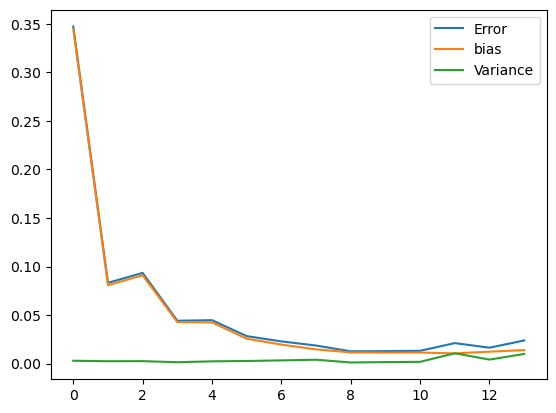

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 100
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

When n=100 (compared to n=40), the variance decreases for a higher complexity, which in turn decreases the MSE.
For n=20, the variance is extremely high for a higher complexity, but the bias is low for low complexity.

Bias:
For a low n, it is easier to fit the model to the data. This gives a low bias in general. 
For a high n, it is not easy to fit a model to the data when you have a low complexity (simple model), which will then have a high bias. But the bias will decrease with complexity. 

Variance:
At higher complexity, the variance will be affected by number of data points. Few data points give an extremely high variance. Increasing the number of data points will give lower variance.
More data points for training -> More "accurate" model for the data/Better fit -> Low variance.
The variance still increases for the complexity.